In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the aesthetics for plots
sns.set_style("whitegrid")

In [2]:
# Load the simulation results into a DataFrame
data = pd.read_csv('simulation_results.csv')

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

   Max Sharpe Ratio                                    Optimal Weights  \
0          0.463795  0.195349 0.0606493 0.162566 0.171375 0.236383 ...   
1          0.079140  0.191451 0.31165 0.258199 0.0627065 0.0262619 ...   
2          0.417912  0.0986939 0.00978133 0.330083 0.303781 0.09905...   
3          0.419159  0.191337 0.0571072 0.258231 0.137264 0.19367 0...   
4          0.479025  0.173006 0.049916 0.186556 0.197129 0.251418 0...   

   Confidence Interval  MPI Wall Time  OMP Wall Time  OMP Threads  MPI Ranks  
0             0.013673        28.2259       0.002819            1          1  
1             0.011508        28.2259       0.002819            1          1  
2             0.015373        28.2259       0.002819            1          1  
3             0.013774        28.2259       0.002819            1          1  
4             0.014249        28.2259       0.002819            1          1  


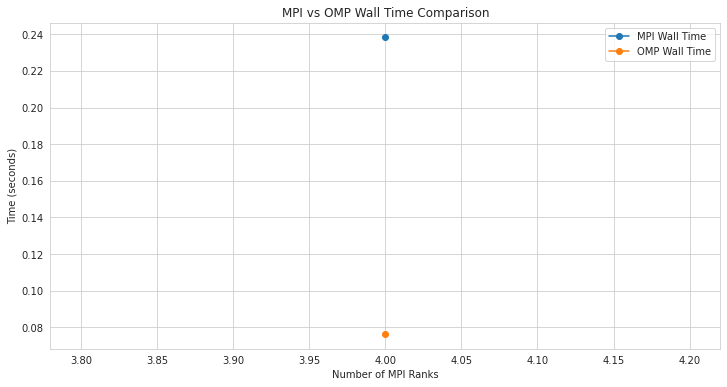

In [3]:
# Plot MPI Wall Time vs OMP Wall Time to compare distributed and shared memory performance
plt.figure(figsize=(12, 6))
plt.plot(data['MPI Ranks'], data['MPI Wall Time'], label='MPI Wall Time', marker='o')
plt.plot(data['MPI Ranks'], data['OMP Wall Time'], label='OMP Wall Time', marker='o')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('Time (seconds)')
plt.title('MPI vs OMP Wall Time Comparison')
plt.legend()
plt.show()

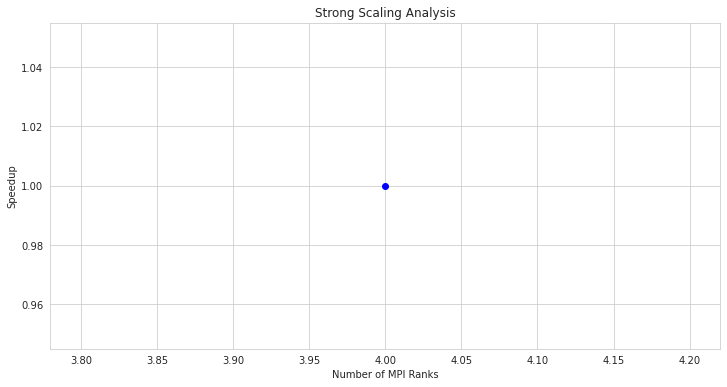

In [4]:
# Strong scaling analysis: fixed problem size, increasing number of processors
plt.figure(figsize=(12, 6))
speedup = data['MPI Wall Time'].iloc[0] / data['MPI Wall Time']
plt.plot(data['MPI Ranks'], speedup, marker='o', linestyle='-', color='b')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('Speedup')
plt.title('Strong Scaling Analysis')
plt.grid(True)
plt.show()

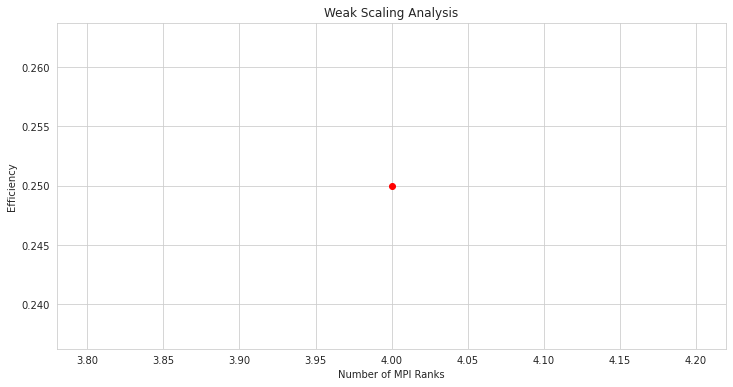

In [5]:
# Assuming data includes varying problem sizes proportional to the number of ranks
# Calculate efficiency for weak scaling
efficiency = speedup / data['MPI Ranks']
plt.figure(figsize=(12, 6))
plt.plot(data['MPI Ranks'], efficiency, marker='o', linestyle='-', color='r')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('Efficiency')
plt.title('Weak Scaling Analysis')
plt.grid(True)
plt.show()

KeyError: 'Load Per Rank'

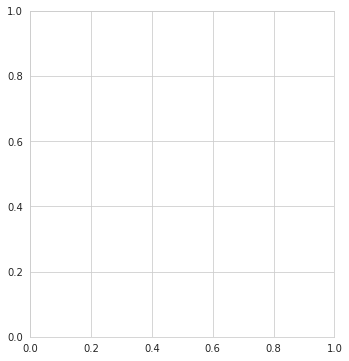

In [6]:
# For this, you would need additional data on memory usage and load per rank/task
# Assuming 'Load Per Rank' and 'Memory Usage' are columns in your data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data['MPI Ranks'], data['Load Per Rank'], marker='o')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('Load Per Rank')
plt.title('Load Distribution Among Ranks')

plt.subplot(1, 2, 2)
plt.plot(data['MPI Ranks'], data['Memory Usage'], marker='o', color='green')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('Memory Usage (GB)')
plt.title('Memory Usage Scaling')
plt.tight_layout()
plt.show()

In [ ]:
# Check if the maximum Sharpe Ratio changes with different configurations
max_sharpe_changes = data['Max Sharpe Ratio'].nunique() > 1
print("Does Maximum Sharpe Ratio change with configuration?", "Yes" if max_sharpe_changes else "No")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('simulation_results.csv')

# Assume optimal weights are space-separated in the CSV, so we need to split them into separate columns
weights_data = data['Optimal Weights'].str.split(expand=True)
weights_data.columns = ['Weight1', 'Weight2', 'Weight3', 'Weight4']  # Update columns based on actual data

data = pd.concat([data, weights_data], axis=1)

In [ ]:
plt.figure(figsize=(12, 6))
plt.errorbar(data.index, data['Max Sharpe Ratio'], yerr=data['Confidence Interval'], fmt='o', label='Sharpe Ratio with Confidence Interval')
plt.title('Sharpe Ratios with Confidence Intervals')
plt.xlabel('Simulation Index')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()

# Visualize the distribution of optimal weights
data[['Weight1', 'Weight2', 'Weight3', 'Weight4']].plot(kind='box')
plt.title('Distribution of Optimal Portfolio Weights')
plt.ylabel('Weight Value')
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
data = pd.read_csv('simulation_results.csv')

# Split the 'Optimal Weights' column into multiple columns
weights = data['Optimal Weights'].str.split(expand=True)
weights.columns = [f'Weight_{i+1}' for i in range(weights.shape[1])]
data = pd.concat([data.drop('Optimal Weights', axis=1), weights.astype(float)], axis=1)

data.head()

,Max Sharpe Ratio,Confidence Interval,MPI Wall Time,OMP Wall Time,OMP Threads,MPI Ranks,Weight_1,Weight_2,Weight_3,Weight_4,Weight_5,Weight_6
0,0.463795,0.027494,0.242741,64,2,NaN,0.195349,0.060649,0.162566,0.171375,0.236383,0.173677
1,0.079140,0.025223,0.242741,64,2,NaN,0.191451,0.311650,0.258199,0.062706,0.026262,0.149732
2,0.417912,0.029152,0.242741,64,2,NaN,0.098694,0.009781,0.330083,0.303781,0.099056,0.158605
3,0.419159,0.027595,0.242741,64,2,NaN,0.191337,0.057107,0.258231,0.137264,0.193670,0.162390
4,0.479025,0.028066,0.242741,64,2,NaN,0.173006,0.049916,0.186556,0.197129,0.251418,0.141976


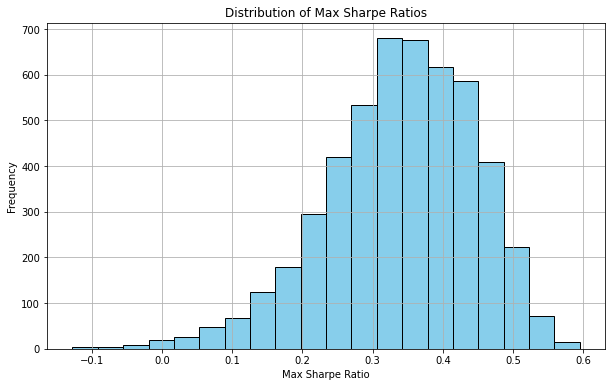

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(data['Max Sharpe Ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Max Sharpe Ratios')
plt.xlabel('Max Sharpe Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

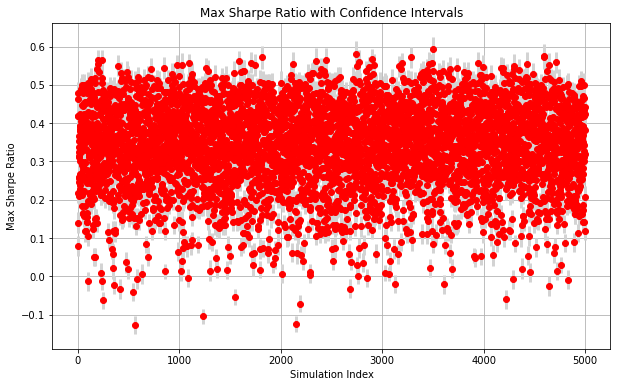

In [4]:
plt.figure(figsize=(10, 6))
plt.errorbar(data.index, data['Max Sharpe Ratio'], yerr=data['Confidence Interval'], fmt='o', color='red', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Max Sharpe Ratio with Confidence Intervals')
plt.xlabel('Simulation Index')
plt.ylabel('Max Sharpe Ratio')
plt.grid(True)
plt.show()

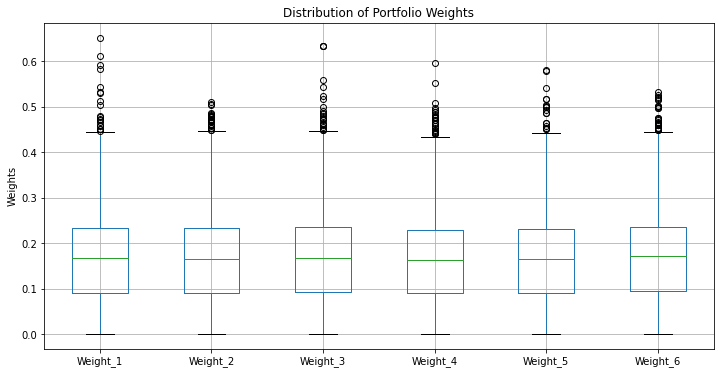

In [5]:
weights_columns = [col for col in data if col.startswith('Weight_')]
data[weights_columns].plot(kind='box', figsize=(12, 6))
plt.title('Distribution of Portfolio Weights')
plt.ylabel('Weights')
plt.grid(True)
plt.show()

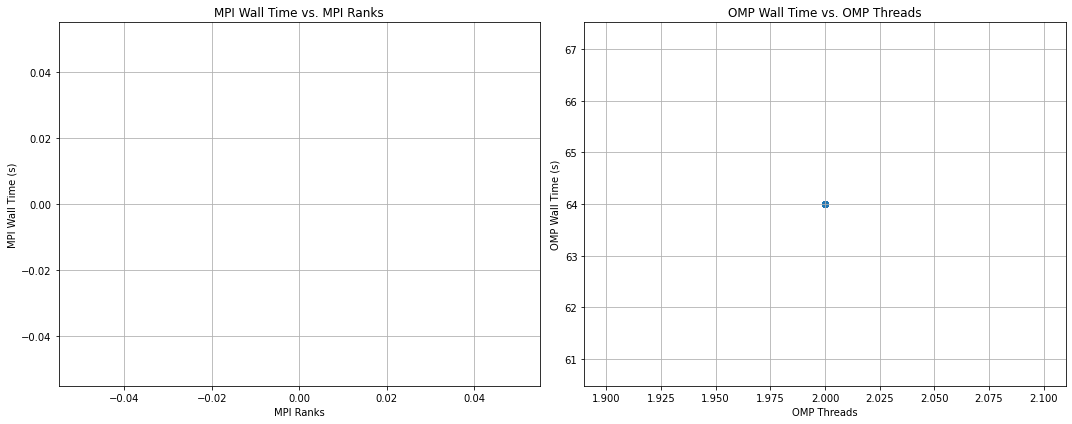

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MPI Wall Time vs. Number of MPI Ranks
ax[0].scatter(data['MPI Ranks'], data['MPI Wall Time'])
ax[0].set_title('MPI Wall Time vs. MPI Ranks')
ax[0].set_xlabel('MPI Ranks')
ax[0].set_ylabel('MPI Wall Time (s)')
ax[0].grid(True)

# OMP Wall Time vs. Number of OMP Threads
ax[1].scatter(data['OMP Threads'], data['OMP Wall Time'])
ax[1].set_title('OMP Wall Time vs. OMP Threads')
ax[1].set_xlabel('OMP Threads')
ax[1].set_ylabel('OMP Wall Time (s)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Correlation matrix
correlation_matrix = data[['Max Sharpe Ratio', 'MPI Wall Time', 'OMP Wall Time', 'OMP Threads', 'MPI Ranks']].corr()
print(correlation_matrix)

                  Max Sharpe Ratio  MPI Wall Time  OMP Wall Time  OMP Threads  \
Max Sharpe Ratio      1.000000e+00   7.548134e-15            NaN          NaN   
MPI Wall Time         7.548134e-15   1.000000e+00            NaN          NaN   
OMP Wall Time                  NaN            NaN            NaN          NaN   
OMP Threads                    NaN            NaN            NaN          NaN   
MPI Ranks                      NaN            NaN            NaN          NaN   

                  MPI Ranks  
Max Sharpe Ratio        NaN  
MPI Wall Time           NaN  
OMP Wall Time           NaN  
OMP Threads             NaN  
MPI Ranks               NaN  


In [4]:
pip install --upgrade seaborn


The following command must be run outside of the IPython shell:

    $ pip install --upgrade seaborn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# TODO: CHANGE PATH TO CORRECT CSV
df = pd.read_csv('simulation_results.csv')
print(df.head())
print(df.describe())

   Max Sharpe Ratio                                    Optimal Weights  \
0          0.463795  0.195349 0.0606493 0.162566 0.171375 0.236383 ...   
1          0.079140  0.191451 0.31165 0.258199 0.0627065 0.0262619 ...   
2          0.417912  0.0986939 0.00978133 0.330083 0.303781 0.09905...   
3          0.419159  0.191337 0.0571072 0.258231 0.137264 0.19367 0...   
4          0.479025  0.173006 0.049916 0.186556 0.197129 0.251418 0...   

   Confidence Interval  MPI Wall Time  OMP Wall Time  OMP Threads  MPI Ranks  
0             0.013673        28.2259       0.002819            1          1  
1             0.011508        28.2259       0.002819            1          1  
2             0.015373        28.2259       0.002819            1          1  
3             0.013774        28.2259       0.002819            1          1  
4             0.014249        28.2259       0.002819            1          1  
       Max Sharpe Ratio  Confidence Interval  MPI Wall Time  OMP Wall Time  \
cou

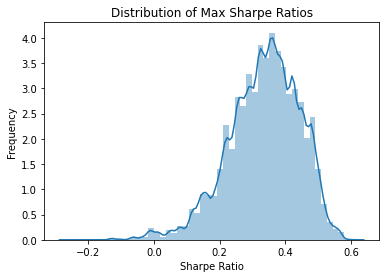

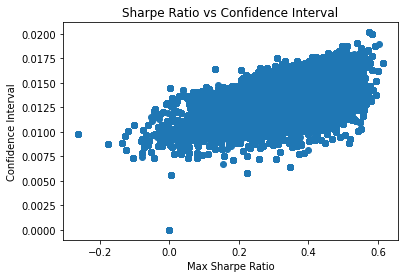

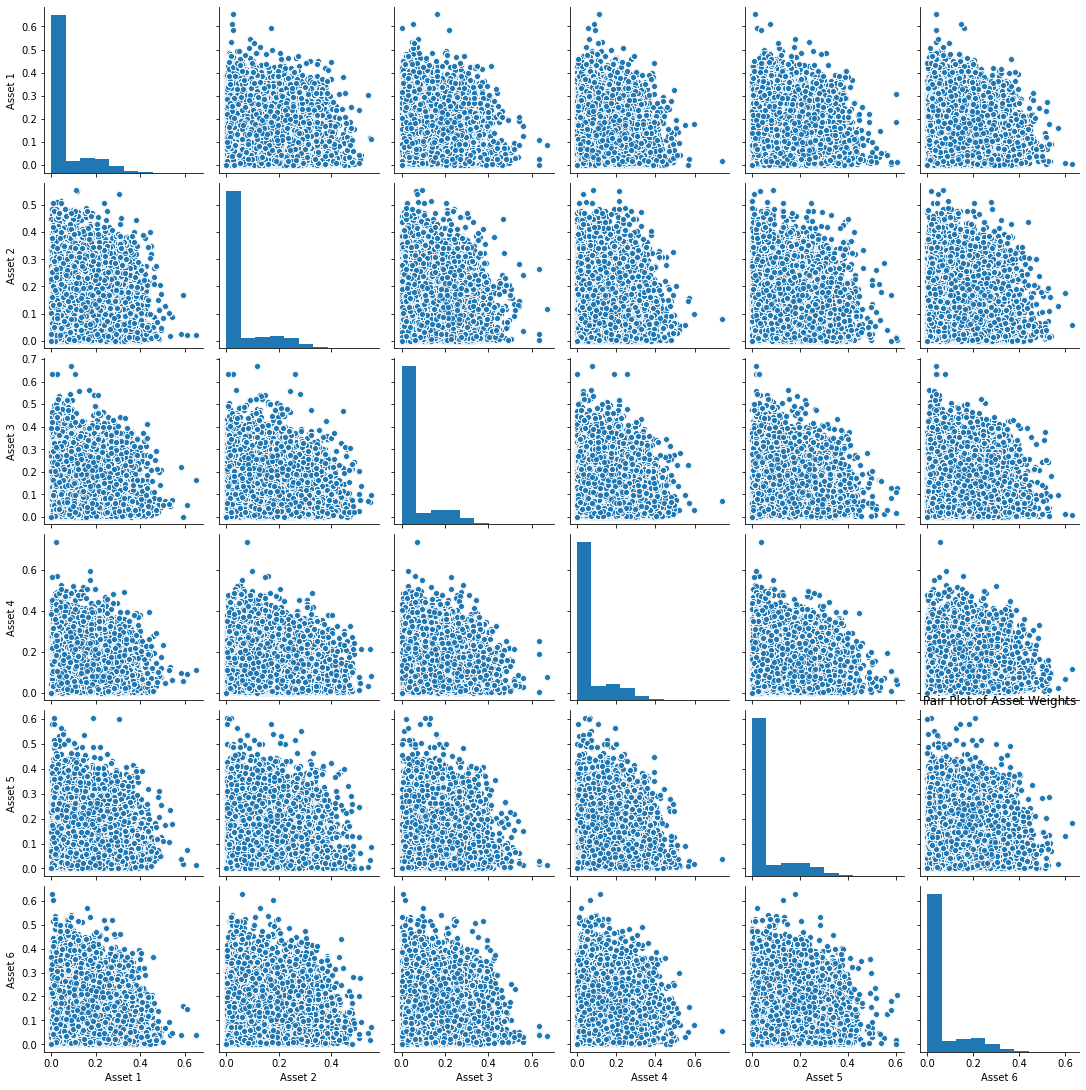

In [5]:
# Sharpe Ratio Distribution using distplot
sns.distplot(df['Max Sharpe Ratio'], kde=True)
plt.title('Distribution of Max Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Sharpe Ratio vs Confidence Interval
plt.scatter(df['Max Sharpe Ratio'], df['Confidence Interval'])
plt.title('Sharpe Ratio vs Confidence Interval')
plt.xlabel('Max Sharpe Ratio')
plt.ylabel('Confidence Interval')
plt.show()

# Extract and visualize individual weights
weights = df['Optimal Weights'].str.split(expand=True).astype(float)
weights.columns = [f'Asset {i+1}' for i in range(weights.shape[1])]
sns.pairplot(weights)
plt.title('Pair Plot of Asset Weights')
plt.show()

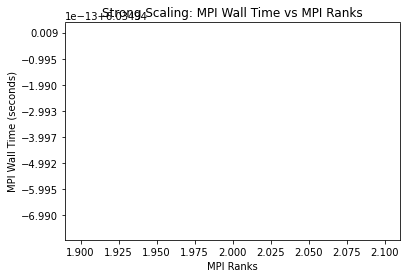

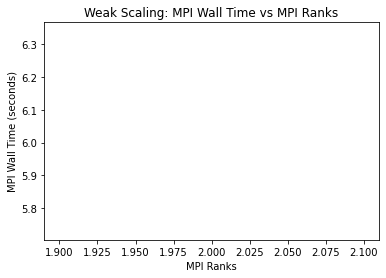

In [10]:
# Strong Scaling: Fixed problem size, varying number of processors
sns.lineplot(data=df, x='MPI Ranks', y='MPI Wall Time')
plt.title('Strong Scaling: MPI Wall Time vs MPI Ranks')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('MPI Wall Time (Seconds)')
plt.show()

# Weak Scaling: Increasing problem size with increasing number of processors
weak_scaling = df.groupby('MPI Ranks').mean().reset_index()
sns.lineplot(data=weak_scaling, x='MPI Ranks', y='MPI Wall Time')
plt.title('Weak Scaling: MPI Wall Time vs MPI Ranks')
plt.xlabel('MPI Ranks')
plt.ylabel('MPI Wall Time (seconds)')
plt.show()


In [4]:
# Calculate speedup and efficiency
baseline_time = df['MPI Wall Time'].iloc[0]  # Assuming the first entry is the baseline
df['Speedup'] = baseline_time / df['MPI Wall Time']
df['Efficiency'] = df['Speedup'] / df['MPI Ranks']
sns.lineplot(data=df, x='MPI Ranks', y='Speedup')
plt.title('Speedup vs MPI Ranks')
plt.xlabel('MPI Ranks')
plt.ylabel('Speedup')
plt.savefig('SpeedUp.png')
plt.close()

sns.lineplot(data=df, x='MPI Ranks', y='Efficiency')
plt.title('Efficiency vs MPI Ranks')
plt.xlabel('MPI Ranks')
plt.ylabel('Efficiency')
plt.savefig('Efficiency.png')
plt.close()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
df = pd.read_csv('simulation_results.csv')

# Convert weights to a list of floats
df['Optimal Weights'] = df['Optimal Weights'].apply(lambda x: list(map(float, x.split())))

# Visualizations
# Distribution of Max Sharpe Ratios
plt.figure(figsize=(10, 6))
sns.distplot(df['Max Sharpe Ratio'], kde=True)
plt.title('Distribution of Max Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('SharpeDistribution.png')
plt.close()

# Scaling Analysis
# Strong scaling: Fixed problem size, varying number of processors
strong_scaling = df[df['OMP Threads'] == 1]  # Assuming the use of 1 thread indicates the full problem size
plt.figure(figsize=(10, 6))
sns.lineplot(data=strong_scaling, x='MPI Ranks', y='MPI Wall Time')
plt.title('Strong Scaling: MPI Wall Time vs MPI Ranks')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('MPI Wall Time (s)')
plt.grid(True)
plt.savefig('StrongScaling.png')
plt.close()

# Weak scaling: Increasing problem size with increasing processors
weak_scaling = df.groupby('MPI Ranks').mean().reset_index()  # Assuming each rank group represents a scaling step
plt.figure(figsize=(10, 6))
sns.lineplot(data=weak_scaling, x='MPI Ranks', y='MPI Wall Time')
plt.title('Weak Scaling: MPI Wall Time vs MPI Ranks')
plt.xlabel('Number of MPI Ranks')
plt.ylabel('Average MPI Wall Time (s)')
plt.grid(True)
plt.savefig('WeakScaling.png')
plt.close()

# MPI and OMP Wall Time comparison
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='OMP Threads', y='OMP Wall Time', hue='MPI Ranks', palette='viridis', size='MPI Wall Time', sizes=(20, 200))
plt.title('MPI vs OMP Wall Time across different configurations')
plt.xlabel('Number of OpenMP Threads')
plt.ylabel('OMP Wall Time (s)')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend(title='MPI Ranks')
plt.savefig('WallTimes.png')
plt.close()

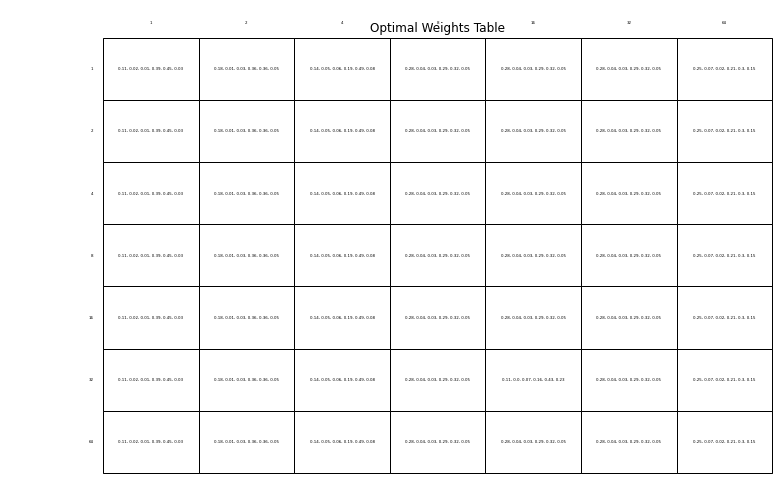

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Load data
df = pd.read_csv('simulation_results.csv')

# Convert the string of weights to a list of floats and filter
df['Optimal Weights'] = df['Optimal Weights'].apply(lambda x: [round(float(weight), 2) for weight in x.split()])
df = df[df['Optimal Weights'].apply(sum) != 0]

# Group by OpenMP threads and MPI ranks, then find the optimal portfolio for each group
optimal_weights = df.groupby(['OMP Threads', 'MPI Ranks']).apply(lambda x: x.loc[x['Max Sharpe Ratio'].idxmax(), 'Optimal Weights'])

# Create a DataFrame to hold the optimal weights for each configuration
weights_table = pd.DataFrame(index=sorted(df['OMP Threads'].unique()), columns=sorted(df['MPI Ranks'].unique()))

# Populate the DataFrame with the optimal weights
for idx, weights in optimal_weights.iteritems():
    threads, ranks = idx
    weights_table.at[threads, ranks] = ', '.join(map(str, weights))

# Display the table
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

tb = Table(ax, bbox=[0, 0, 1, 1])

# Add cells
nrows, ncols = weights_table.shape
width, height = 1.0 / ncols, 1.0 / nrows

for i in range(nrows):
    for j in range(ncols):
        tb.add_cell(i, j, width, height, text=weights_table.iloc[i, j], loc='center')

# Row and Column Labels...
for i, label in enumerate(weights_table.index):
    tb.add_cell(i, -1, width, height, text=label, loc='right', edgecolor='none', facecolor='none')
for j, label in enumerate(weights_table.columns):
    tb.add_cell(-1, j, width, height/2, text=label, loc='center', edgecolor='none', facecolor='none')

ax.add_table(tb)
plt.title('Optimal Weights Table')
plt.savefig('weights_table.png')
plt.show()


In [26]:
import pandas as pd
import ast

# Load data from CSV
df = pd.read_csv('simulation_results.csv')

# Filter out 0 entries
df['Optimal Weights'] = df['Optimal Weights'].apply(lambda x: list(map(float, x.split())))
df = df[df['Optimal Weights'].apply(sum) != 0]

# Group by OpenMP threads and MPI ranks, then find the optimal portfolio for each group
max_sharpe = df.groupby(['OMP Threads', 'MPI Ranks']).apply(lambda x: x.loc[x['Max Sharpe Ratio'].idxmax(), 'Max Sharpe Ratio'])

# Create a DataFrame to hold the optimal weights for each configuration
sharpe_table = pd.DataFrame(index=sorted(df['OMP Threads'].unique()), columns=sorted(df['MPI Ranks'].unique()))

# Populate the DataFrame with the optimal weights
for idx, sharpe_val in max_sharpe.iteritems():
    threads, ranks = idx
    sharpe_table.at[threads, ranks] = sharpe_val

# Display the table
sharpe_table

,1,2,4,8,16,32,64
1,0.613338,0.595019,0.571816,0.565335,0.565335,0.565335,0.516187
2,0.613338,0.595019,0.571816,0.565335,0.565335,0.565335,0.516187
4,0.613338,0.595019,0.571816,0.565335,0.565335,0.565335,0.516187
8,0.613338,0.595019,0.571816,0.565335,0.565335,0.565335,0.516187
16,0.613338,0.595019,0.571816,0.565335,0.565335,0.565335,0.516187
32,0.613338,0.595019,0.571816,0.565335,0.568176,0.565335,0.516187
64,0.613338,0.595019,0.571816,0.565335,0.565335,0.565335,0.516187


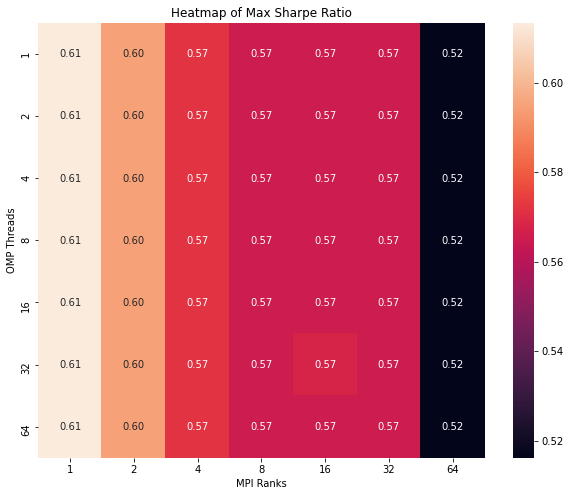

In [27]:
import seaborn as sns

# Group by OpenMP threads and MPI ranks, then find the optimal weights for each group
optimal_weights = df.groupby(['OMP Threads', 'MPI Ranks']).apply(lambda x: x.loc[x['Max Sharpe Ratio'].idxmax(), 'Optimal Weights'])
optimal_sharpe = df.groupby(['OMP Threads', 'MPI Ranks'])['Max Sharpe Ratio'].max().unstack()

# Create a heatmaps of the optimal weights and Sharpe values
plt.figure(figsize=(10, 8))
sns.heatmap(optimal_sharpe, annot=True, fmt=".2f")
plt.title('Heatmap of Max Sharpe Ratio')
plt.xlabel('MPI Ranks')
plt.ylabel('OMP Threads')
plt.savefig('OptimalSharpe.png')
plt.close()